## Thinkful Unit 1 Capstone

#### By Kelly M Curtis

### Can we use accident data to allocate when and where emergency personnel should be located?

This [dataset](https://www.kaggle.com/xvivancos/barcelona-data-sets) was taken from Kaggle and based on a list of accidents handled by the local police in the city of Barcelona in 2017. Incorporates the number of injuries by severity, the number of vehicles and the point of impact.

I chose this dataset as I have never been to Spain and I am not familiar with their driving habits and therefore would have no bias towards the data.  

As with any place that people drive in the world, you will have accidents and need emergency personnel to help deal to help assist with those involved in the accident.  However,  if there is a lot of traffic and many accidents, but not enough emergency personnel to assist then there could be problems.  

My goal is to determine what times of year, week, or day the city of Barcelona should ramp up their emergency personnel to deal with accidents in a timely manner.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
%matplotlib inline
sns.set(style='whitegrid')

In [3]:
# Retrieving dataset
df = pd.read_csv('accidents_2017.csv', 
                       sep=',' ,index_col=None, encoding='latin-1')

In [4]:
df.head()

,Id,District Name,Neighborhood Name,Street,Weekday,Month,Day,Hour,Part of the day,Mild injuries,Serious injuries,Victims,Vehicles involved,Longitude,Latitude
0,2017S008429,Unknown,Unknown,NÃºmero 27 ...,Friday,October,13,8,Morning,2,0,2,2,2.125624,41.340045
1,2017S007316,Unknown,Unknown,NÃºmero 3 Zona Franca / NÃºmero 50 Zona Franca...,Friday,September,1,13,Morning,2,0,2,2,2.120452,41.339426
2,2017S010210,Unknown,Unknown,Litoral (BesÃ²s) ...,Friday,December,8,21,Afternoon,5,0,5,2,2.167356,41.360885
3,2017S006364,Unknown,Unknown,NÃºmero 3 Zona Franca ...,Friday,July,21,2,Night,1,0,1,2,2.124529,41.337668
4,2017S004615,Sant MartÃ­,el Camp de l'Arpa del Clot,Las Navas de Tolosa ...,Thursday,May,25,14,Afternoon,1,0,1,3,2.185272,41.416365


In [5]:
# Removing columns that are not useful as features
df1 = df.drop(columns=['Neighborhood Name','Street','Longitude','Latitude'])

df1.head()

,Id,District Name,Weekday,Month,Day,Hour,Part of the day,Mild injuries,Serious injuries,Victims,Vehicles involved
0,2017S008429,Unknown,Friday,October,13,8,Morning,2,0,2,2
1,2017S007316,Unknown,Friday,September,1,13,Morning,2,0,2,2
2,2017S010210,Unknown,Friday,December,8,21,Afternoon,5,0,5,2
3,2017S006364,Unknown,Friday,July,21,2,Night,1,0,1,2
4,2017S004615,Sant MartÃ­,Thursday,May,25,14,Afternoon,1,0,1,3


In [28]:
df1.shape

(10339, 15)

In [6]:
# Check for unique items
df1.nunique()

Id                   10335
District Name           11
Weekday                  7
Month                   12
Day                     31
Hour                    24
Part of the day          3
Mild injuries           11
Serious injuries         4
Victims                 11
Vehicles involved       14
dtype: int64

Since there are 11 unique district names, it would be worth checking out if certain districts are more prone to accidents.  I am going to assign numbers to each district to make it easier for aggregating.

In [7]:
# List unique values in the district names column
df1['District Name'].unique()

array(['Unknown', 'Sant MartÃ\xad', 'Ciutat Vella', 'Eixample',
       'Sants-MontjuÃ¯c', 'Les Corts', 'SarriÃ\xa0-Sant Gervasi',
       'GrÃ\xa0cia', 'Horta-GuinardÃ³', 'Nou Barris', 'Sant Andreu'],
      dtype=object)

In [8]:
# Assigning numbers to each of the districts will definitely make it easier, since 
# the districts have some odd characters in them.
# First creating a dict for the district:
district = {'Unknown':1,
           'Sant MartÃ\xad':2,
           'Ciutat Vella':3,
           'Eixample':4,
           'Sants-MontjuÃ¯c':5,
           'Les Corts':6,
           'SarriÃ\xa0-Sant Gervasi':7,
           'GrÃ\xa0cia':8,
           'Horta-GuinardÃ³':9,
           'Nou Barris':10,
           'Sant Andreu':11}

# Now add this district column to the dataset
df1['district'] = df['District Name'].replace(district)

In [9]:
# Adding a count column to make counts easier
df1['count'] = 1

In [10]:
df1.head()

,Id,District Name,Weekday,Month,Day,Hour,Part of the day,Mild injuries,Serious injuries,Victims,Vehicles involved,district,count
0,2017S008429,Unknown,Friday,October,13,8,Morning,2,0,2,2,1,1
1,2017S007316,Unknown,Friday,September,1,13,Morning,2,0,2,2,1,1
2,2017S010210,Unknown,Friday,December,8,21,Afternoon,5,0,5,2,1,1
3,2017S006364,Unknown,Friday,July,21,2,Night,1,0,1,2,1,1
4,2017S004615,Sant MartÃ­,Thursday,May,25,14,Afternoon,1,0,1,3,2,1


Understanding whether certain district may have more accidents than others would be helpful to plan enough emergency personel to be in those areas.  Also, if there is a trend in a particular district there could be insurance fraud occurring and may need to be reported.

In [50]:
# Average accidents for district
dist_mn = df1.groupby('district').agg({'count':'size'}).rename(columns={'count':'acc_count'}).reset_index(drop=False)

print('Average Accidents for Districts')
((dist_mn['acc_count'])/(dist_mn['district'])).mean()


Average Accidents for Districts


219.01523350386987

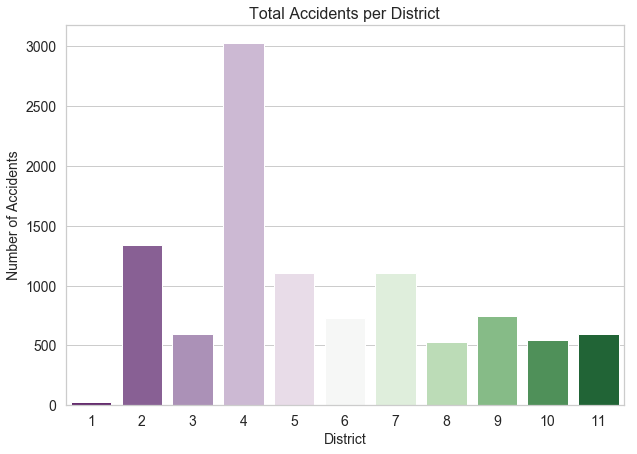

In [12]:
# Accidents per district
sns.set_style('whitegrid')
plt.figure(figsize=(10,7))

sns.countplot(x='district', data=df1, palette='PRGn')

plt.title('Total Accidents per District', size=16)
plt.xlabel('District', size=14)
plt.ylabel('Number of Accidents', size=14)
plt.xticks(size=14)
plt.yticks(size=14)
plt.show()

Fortunately District 1, which is an unknown has very few accidents, so that unknown variable is not a concern. District 4, which is the _Eixample_ district, has a significant amount of accidents. It has over 50% more than any other district.  Districts 2, 5, and 7 are areas that have more accidents than the other districts.

We do know the 10,335 rows of data all had unique Id numbers, so we would need information that is currently not represented in the data to find out about possible outliers in the number of accidents.  For now we can note that it has a larger amount of accidents compared to the rest of the districts.

In [13]:
# Assigning numbers to the months to make them easier to read on plots
month = {'January':1, 
        'February':2, 
        'March':3,
        'April':4,
        'May':5,
        'June':6,
        'July':7,
        'August':8,
        'September':9,
        'October':10,
        'November':11,
        'December':12}

df1['month'] = df1['Month'].replace(month)

Knowing what season accidents happen may also help with understanding why accidents are happening during certain times of year.  For example, the spring may have festivals that may have more people out to attend than another time of year.

In [14]:
# Creating a dict to inspect accidents per season
season = {'January':'winter','February':'winter', 'March':'spring', 'April':'spring',
         'May':'spring','June':'summer','July':'summer','August':'summer',
         'September':'autumn','October':'autumn','November':'autumn','December':'winter'}

df1['season'] = df1['Month'].replace(season)

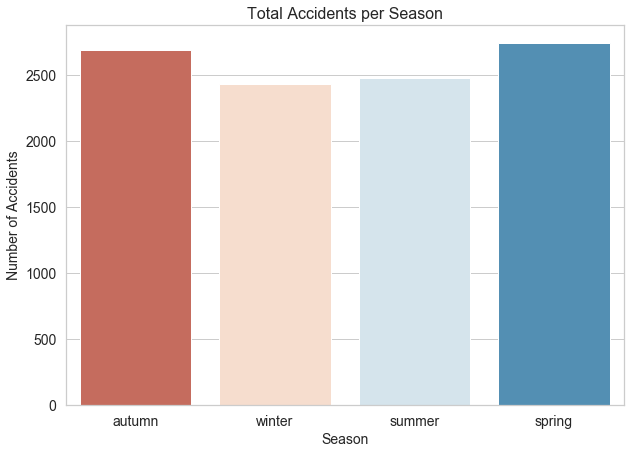

In [15]:
# Plot accidents per season
plt.figure(figsize=(10,7))

sns.countplot(x='season', data=df1, palette='RdBu')

plt.title('Total Accidents per Season', size=16)
plt.xlabel('Season', size=14)
plt.ylabel('Number of Accidents', size=14)
plt.xticks(size=14)
plt.yticks(size=14)
plt.show()

The accidents per season do not show where one season has significantly more accidents than any of the other season.  In the [wiki](https://en.wikipedia.org/wiki/Barcelona) for Barcelona, it is noted that Barcelona _is known for hosting the 1992 Summer Olympics as well as world-class conferences and expositions and also many international sport tournaments._  This would infer that every season has something going on and people visiting Barcelona for a variety of reasons.  

Perhaps there are more accidents during particular months that will stand out.

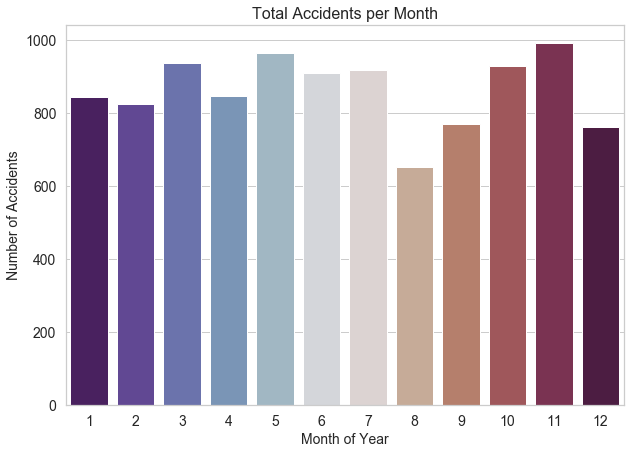

In [16]:
# Plot accidents per month
plt.figure(figsize=(10,7))

sns.countplot(x='month', data=df1, palette='twilight_shifted')

plt.title('Total Accidents per Month', size=16)
plt.xlabel('Month of Year', size=14)
plt.ylabel('Number of Accidents', size=14)
plt.xticks(size=14)
plt.yticks(size=14)
plt.show()

I thought this seems high for the amount of accidents per month.  However when I went to review information on Barcelona [wiki](https://en.wikipedia.org/wiki/Barcelona), the population in 2018 for the city of Barcelona was 1,620,343.  So the total of accidents for the year 2017 compared to the population of 2018 is only 0.006% of the population. That is assuming that the population has not changed significantly from 2017 to 2018.  However if you calculate all the tourists that visit each year, the amount of accidents that occur are a very small amount for such a population. Seems I did not realize how many accidents are too many, though any accident is not a good day for anyone.

Due to the amount of accidents being such a small amount compared to the population, I decided to look to see if Barcelona has some type of public transportation system.  And it does.  Per the [wiki](https://en.wikipedia.org/wiki/Barcelona#Transport), they have a Metro and a regional rail, a tram, funicular and cable cars, and bus system.  They have many options for people to avoid driving and hence avoid getting into accidents.

Yet there are still accidents.  I want to see if there is a different in days of the week and accidents.

In [17]:
# Changing Weekday to categorical so it  will plot in correct order
df1['Weekday'] = pd.Categorical(df1['Weekday'], categories=['Monday', 'Tuesday', 'Wednesday',
                                                           'Thursday', 'Friday','Saturday', 
                                                           'Sunday'], ordered=True)

In [18]:
# Changing Part of the Day to categorical to plot in correct order
df1['Part of the day'] = pd.Categorical(df1['Part of the day'], categories=['Morning', 
                                                                           'Afternoon',
                                                                           'Night'], ordered=True)

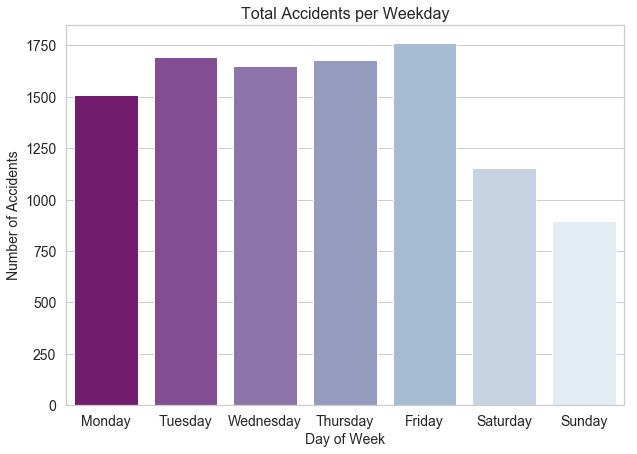

In [19]:
plt.figure(figsize=(10,7))

sns.countplot(x='Weekday', data=df1, palette='BuPu_r')
plt.title('Total Accidents per Weekday', size=16)
plt.xlabel('Day of Week', size=14)
plt.ylabel('Number of Accidents', size=14)
plt.xticks(size=14)
plt.yticks(size=14)
plt.show()

Seeing that more accidents happen on the weekdays versus the weekends, we could make an assumption that during commuting times there are more accidents.  So let us look at accidents during the days of the week and see if the commuting hours correspond with more accidents.  

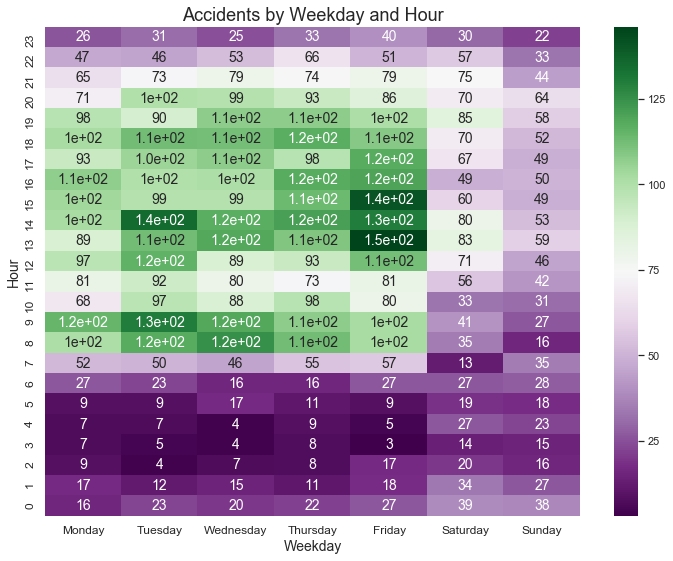

In [20]:
count_heatmap = pd.pivot_table(df1, values='count', index='Hour', columns='Weekday',
                              aggfunc=np.sum).sort_index(ascending=False)

plt.figure(figsize=(12,9))
sns.heatmap(count_heatmap,
           cmap='PRGn',
           annot=True,
           annot_kws={'size':14})
plt.title('Accidents by Weekday and Hour', size=18)
plt.xlabel('Weekday', size=14)
plt.ylabel('Hour', size=14)
plt.xticks(size=12)
plt.yticks(size=12)
plt.show()

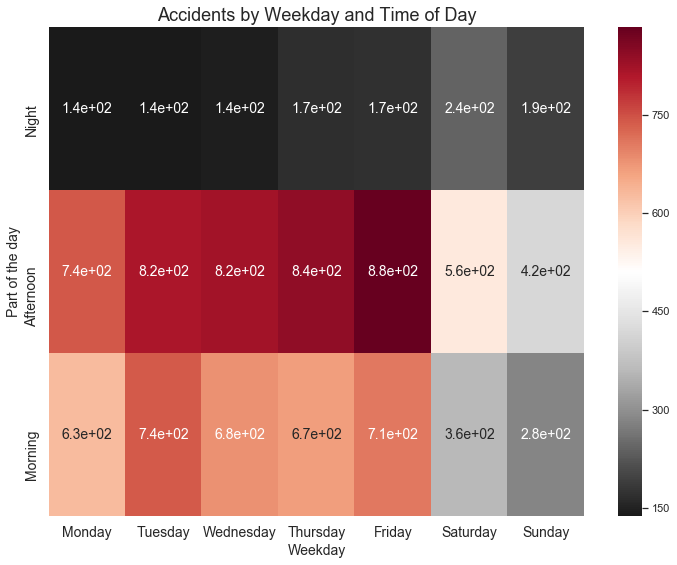

In [21]:
# Accidents per Day of Week and Time of Day
day_count_heatmap = pd.pivot_table(df1, values='count', index='Part of the day',
                              columns='Weekday', aggfunc=np.sum).sort_index(ascending=False)

plt.figure(figsize=(12,9))
sns.heatmap(day_count_heatmap,
           cmap='RdGy_r',
           annot=True,
           annot_kws={'size':14})
plt.title('Accidents by Weekday and Time of Day', size=18)
plt.xlabel('Weekday', size=14)
plt.ylabel('Part of the day', size=14)
plt.xticks(size=14)
plt.yticks(size=14)
plt.show()

I found an [article by Expatica](https://www.expatica.com/es/employment/employment-basics/typical-workday-107915/) that explains the hours people in Spain keep and helps in understanding all the information we have discovered.  

The two heatmaps show the majority of our accidents occur between the days Monday through Friday showing the most occur on Friday.  This corresponds with the idea that accidents happen on days people commute to work.

We can also see more accidents happen in the afternoon, then in the morning and the least at night.  People in Spain start their work days later than in the US around 9:30am - 10:00am.  And they take a siesta(lunch) around 2:00pm and it can take 1 1/2 hours to 3 hours long.  And then back to the office and work unti 8:00pm-9:00pm.  It is noted in the article that 9:00pm is considered "afternoon".  

The most accidents occur in November and the least in August.  Due to the August head in Spain, many companies close for the entire month or switch to "summer hours".  So less people commuting equates to less traffic and less accidents.  There is no explanation for November's uptake in accidents, but I would take the view that since December has a drop in accidents people are trying to get work done ahead of time and shopping for the holidays and that would lead for an increase in accidents.

Now we have seen the amount of accidents, let us see how many have serious injuries compared to minor injuries.

In [22]:
# Creating an object to run the numerical columns through a .describe
accident_numbers = df1[['Mild injuries','Serious injuries','Victims']]

accident_numbers.describe()

,Mild injuries,Serious injuries,Victims
count,10339.000000,10339.000000,10339.000000
mean,1.154174,0.023310,1.178644
std,0.742294,0.163803,0.735145
min,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000
50%,1.000000,0.000000,1.000000
75%,1.000000,0.000000,1.000000
max,10.000000,4.000000,10.000000


While there are quite a few accidents, there are mild injuries than serious injuries.  There is an average of 1.15 mild injuries, 0.023 serious injuries, and 1.178 victims per accident.  That is pretty low as an average. There are quite a few accidents with no injuries or victims, but you still have accidents happening.  We can still make a difference by having emergency personnel close by for when we have bad accidents.

Let's see what the numbers show us.

In [23]:
df1.groupby('Part of the day')[['Serious injuries','Mild injuries',
                               'Victims', 'Vehicles involved']].mean()

,Serious injuries,Mild injuries,Victims,Vehicles involved
Part of the day,,,,
Morning,0.019425,1.137694,1.158594,1.928448
Afternoon,0.023613,1.174538,1.198741,1.917749
Night,0.035294,1.123529,1.161345,1.909244


This is goes along with what we have been seeing along the way that most accident are in the afternoon and then morning.  However it seems if there is an accident at night it has serious and mild injuries and night is where there are the least amount of accidents.  So these accidents seem to be a little more dangerous.  This could be a concern with making sure there are seasoned emergency workers available to deal with these type of accidents.

Let's look at this in a plot that is easier to discern by the eye.

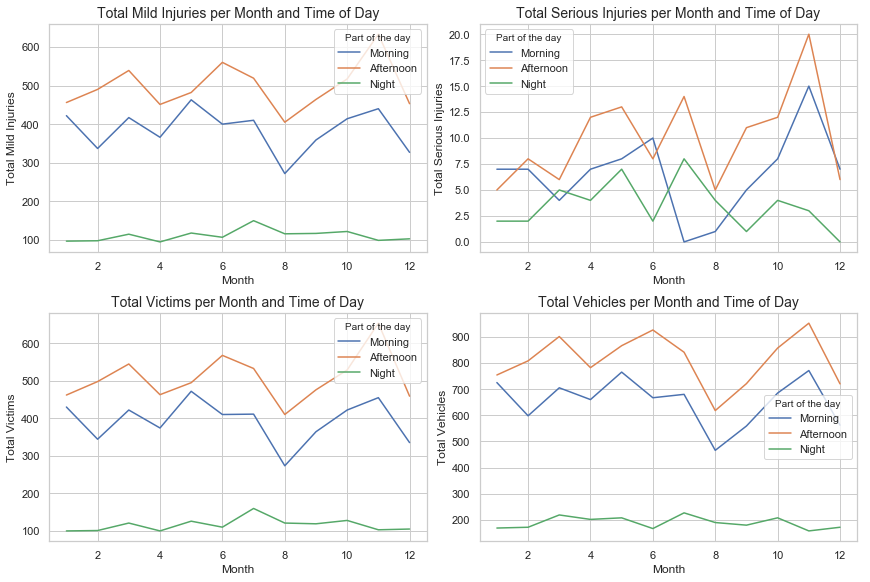

In [24]:
mild_piv = df1.pivot_table('Mild injuries', index='month', columns='Part of the day', aggfunc='sum')
ser_piv = df1.pivot_table('Serious injuries', index='month', columns='Part of the day', aggfunc='sum')
vic_piv = df1.pivot_table('Victims', index='month', columns='Part of the day', aggfunc='sum')
veh_piv = df1.pivot_table('Vehicles involved', index='month', columns='Part of the day', aggfunc='sum')

fig = plt.figure(figsize=(12,8))

ax01 = fig.add_subplot(221)
mild_piv.plot(kind='line', ax=ax01)
ax01.set_title('Total Mild Injuries per Month and Time of Day', size=14)
ax01.set_xlabel('Month')
ax01.set_ylabel('Total Mild Injuries')

ax02 = fig.add_subplot(222)
ser_piv.plot(kind='line', ax=ax02)
ax02.set_title('Total Serious Injuries per Month and Time of Day', size=14)
ax02.set_xlabel('Month')
ax02.set_ylabel('Total Serious Injuries')

ax03 = fig.add_subplot(223)
vic_piv.plot(kind='line', ax=ax03)
ax03.set_title('Total Victims per Month and Time of Day', size=14)
ax03.set_xlabel('Month')
ax03.set_ylabel('Total Victims')

ax04 = fig.add_subplot(224)
veh_piv.plot(kind='line', ax=ax04)
ax04.set_title('Total Vehicles per Month and Time of Day', size=14)
ax04.set_xlabel('Month')
ax04.set_ylabel('Total Vehicles')

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()
                

In all the plots, night has the least impact except for in Serious Injuries in the 5th and 7th months of the year.  While night still has the least overall injuries, however when accidents happen at night they seem to have serious injuries.  Perhaps alcohol is involved increasing the chances of more people riding home together and more injuries occurring.  We probably should suggest more people to take public transportation home at night.

Since the 4th district has the highest amount of accidents, 50% more than any other district, let us see when these accidents occur.

In [58]:
# Getting District data for the districts that have the most accidents
district2 = df1[df1.district == [2]]  # Sant MartÃ\xad
district4 = df1[df1.district == [4]]  # Eixample
district5 = df1[df1.district == [5]]  # Sants-MontjuÃ¯c
district7 = df1[df1.district == [7]]  # SarriÃ\xa0-Sant Gervasi

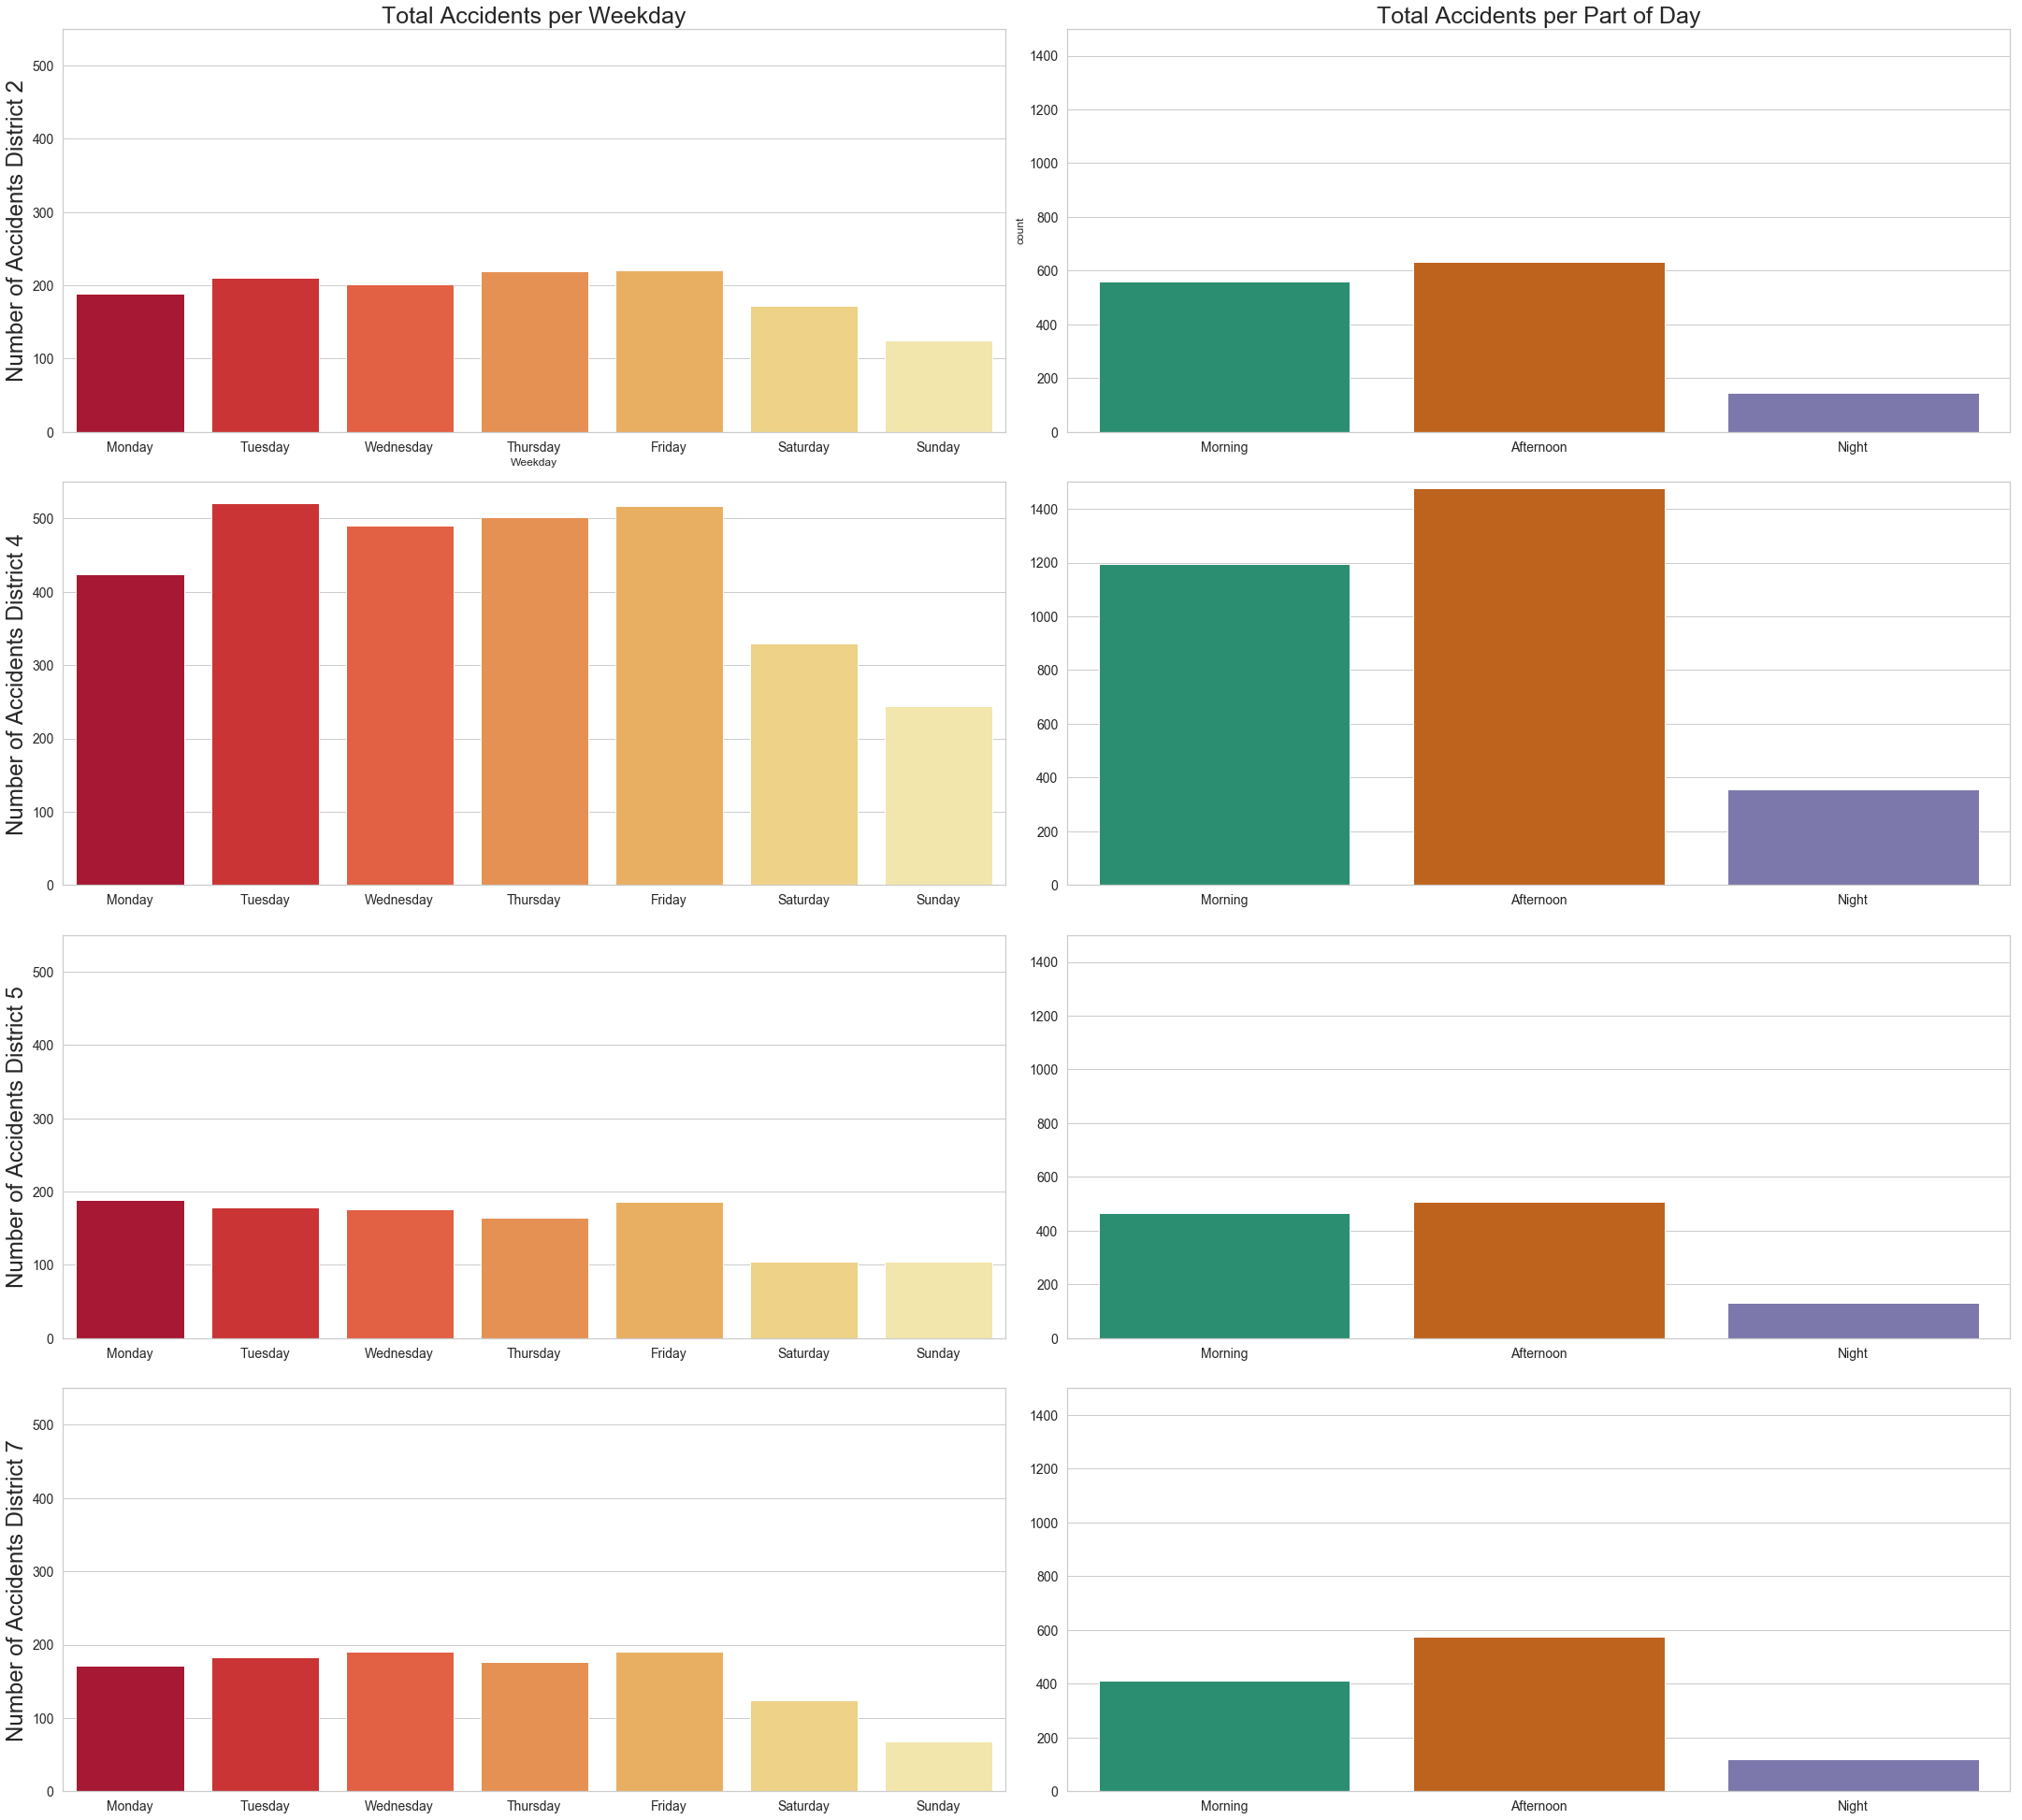

In [90]:
# Plotting accidents in District 2 at different times
plt.figure(figsize=(30,27))

# DISTRICT 2
plt.subplot(421)
sns.countplot(x='Weekday', data=district2, palette='YlOrRd_r')
plt.title('Total Accidents per Weekday', size=25)
#plt.xlabel('Day of Week', size=16)
plt.ylim(0, 550)
plt.ylabel('Number of Accidents District 2', size=24)
plt.xticks(size=14)
plt.yticks(size=14)

plt.subplot(422)
sns.countplot(x='Part of the day', data=district2, palette='Dark2')
plt.title('Total Accidents per Part of Day', size=25)
plt.xlabel('')
plt.ylim(0, 1500)
#plt.ylabel('Number of Accidents', size=16)
plt.xticks(size=14)
plt.yticks(size=14)

# DISTRICT 4
plt.subplot(423)
sns.countplot(x='Weekday', data=district4, palette='YlOrRd_r')
plt.xlabel('')
plt.ylim(0, 550)
plt.ylabel('Number of Accidents District 4', size=24)
plt.xticks(size=14)
plt.yticks(size=14)

plt.subplot(424)
sns.countplot(x='Part of the day', data=district4, palette='Dark2')
plt.xlabel('')
plt.ylim(0, 1500)
plt.ylabel('')
plt.xticks(size=14)
plt.yticks(size=14)

# DISTRICT 5
plt.subplot(425)
sns.countplot(x='Weekday', data=district5, palette='YlOrRd_r')
plt.xlabel('')
plt.ylim(0, 550)
plt.ylabel('Number of Accidents District 5', size=24)
plt.xticks(size=14)
plt.yticks(size=14)

plt.subplot(426)
sns.countplot(x='Part of the day', data=district5, palette='Dark2')
plt.xlabel('')
plt.ylim(0, 1500)
plt.ylabel('')
plt.xticks(size=14)
plt.yticks(size=14)

# DISTRICT 7
plt.subplot(427)
sns.countplot(x='Weekday', data=district7, palette='YlOrRd_r')
plt.xlabel('')
plt.ylim(0, 550)
plt.ylabel('Number of Accidents District 7', size=24)
plt.xticks(size=14)
plt.yticks(size=14)

plt.subplot(428)
sns.countplot(x='Part of the day', data=district7, palette='Dark2')
plt.xlabel('')
plt.ylabel('')
plt.ylim(0, 1500)
plt.xticks(size=14)
plt.yticks(size=14)

plt.tight_layout(pad=0.6, w_pad=0.5, h_pad=1.0)

plt.show()

I changed the limit of the accidents to be the same on each plot, so we can visually know we are comparing apples to apples.  While we can see afternoons and weekdays have the highest accidents in each district and mornings are not too far behind, District 4 is an area we need to ramp up resources to assist with the amount of accidents.

## Research Proposal

As long as people have to travel to get someplace there will alway be accidents.  The best we can do is prepare in advance to lessed the affect of an accident.  One way is to encourage use of public transit and the other is to have emergency personnel closeby to help prevent injuries from becoming worse, getting victims treated as soon as possible, and clean up the accident so traffic isn't impacted as long.  

### Hypothesis
The creation of a two-pronged campaign, focused on making sure there are enough emergency personnel out and in the right areas to assist when accidents do happen and encouraging more people to use Barcelona's public transit to avoid getting into accidents.

### Experimental Design
I propose a media campaign to encourage the public to make use of the public transit to avoid getting into accidents, drinking and driving, and less their carbon foot print at the same time.  At the same time, emergency personnel will be allocated accordingly during the higher times of accidents in the afternoon and to increase District 4's allocation.

The initial rollout will begin in October and go through March.  If accidents decrease by a total of 10% or 1,034 accidents, then conclude that the campaign is successful.  Continue the campaign and make adjustments as needed by reviewing the data quarterly.